# A Deep Learning Approach for Higgs Boson Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Loading training y test dataset into the code 

In [2]:
data_train = pd.read_csv('higgs-boson/training.csv')
data_train.shape

(250000, 33)

In [3]:
data_test = pd.read_csv('higgs-boson/test.csv')
data_test.shape

(550000, 31)

# Exploratory Data Analysis and Processing

First of all, we will show the head of our training dataset 

In [4]:
data_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


We can see that there are 33 attributes in the dataset

Also we can know how they are distributed

In [5]:
# Attributes 1 - 15
data_train[data_train.columns.values[:15]].describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000


In [6]:
# Attributes 16 - 33
data_train[data_train.columns.values[15:]].describe()

,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


We remove the irrelevant attribute 'EventId' from our dataset

In [7]:
data_train = data_train.drop(['EventId'], axis=1)

Label parameter has two values, 's' and 'b', we want to change this variables to numerical

In [8]:
data_train['Label'].describe()

count     250000
unique         2
top            b
freq      164333
Name: Label, dtype: object

In [9]:
# Change 'Label' attribute from categorical to numerical
data_train['Label'] = [0 if i == 's' else 1 for i in data_train['Label']]
data_train.head(10)['Label']

0    0
1    1
2    1
3    1
4    1
5    1
6    0
7    0
8    1
9    0
Name: Label, dtype: int64

We create a function to get the attributes with a big amount of instances with -999 value

In [10]:
def get_negative_or_NaN_attributes_by_percentage(percentage, verbose = True):
    remove_v = []
    for ith_attribute in data_train.columns.values:
        current_attribute = data_train[ith_attribute]
        
        count_negative = sum(k == -999 for k in current_attribute)
        negative_attribute_percentage = count_negative * 100 / len(current_attribute)
        count_NaN = sum(k == np.NaN for k in current_attribute)
        nan_attribute_percentage = count_NaN * 100 / len(current_attribute)
        
        if negative_attribute_percentage > percentage or nan_attribute_percentage > percentage:
            if verbose:
                print(ith_attribute, ' ==> ',
                      'Negative: ' + str(negative_attribute_percentage) + '%,',
                      'NaN: ' + str(nan_attribute_percentage) + '%')
            remove_v.append(ith_attribute)
    return remove_v

In [11]:
attributes_to_remove = get_negative_or_NaN_attributes_by_percentage(30)

DER_deltaeta_jet_jet  ==>  Negative: 70.9828%, NaN: 0.0%
DER_mass_jet_jet  ==>  Negative: 70.9828%, NaN: 0.0%
DER_prodeta_jet_jet  ==>  Negative: 70.9828%, NaN: 0.0%
DER_lep_eta_centrality  ==>  Negative: 70.9828%, NaN: 0.0%
PRI_jet_leading_pt  ==>  Negative: 39.9652%, NaN: 0.0%
PRI_jet_leading_eta  ==>  Negative: 39.9652%, NaN: 0.0%
PRI_jet_leading_phi  ==>  Negative: 39.9652%, NaN: 0.0%
PRI_jet_subleading_pt  ==>  Negative: 70.9828%, NaN: 0.0%
PRI_jet_subleading_eta  ==>  Negative: 70.9828%, NaN: 0.0%
PRI_jet_subleading_phi  ==>  Negative: 70.9828%, NaN: 0.0%


/Users/eabg97/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


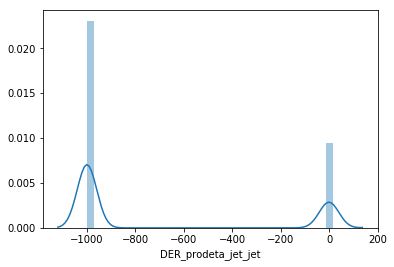

In [12]:
sns.distplot(data_train['DER_prodeta_jet_jet'])

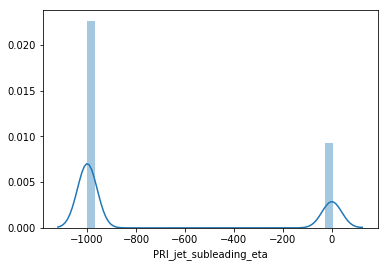

In [13]:
sns.distplot(data_train['PRI_jet_subleading_eta'])

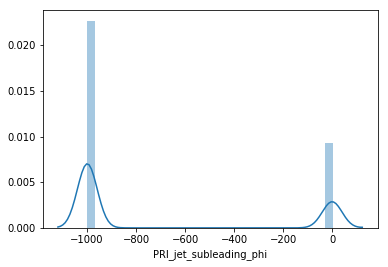

In [14]:
sns.distplot(data_train['PRI_jet_subleading_phi'])

So, we proceed to remove this variables

In [15]:
data_train = data_train.drop(attributes_to_remove, axis=1)
data_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,0
1,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,1
2,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,1
3,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,1
4,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,1


We has the DER_mass_MMC which has a low number of parameters -999 in our dataset, so we are going to change those values by the mean of the remain of the data in that column

In [16]:
attributes_to_preprocess = get_negative_or_NaN_attributes_by_percentage(0, False)
print(attributes_to_preprocess)

['DER_mass_MMC']


In [17]:
# Total -999
sum(i == -999 for i in data_train['DER_mass_MMC'])

38114

In [18]:
def change_NaN_or_negative_rows_to_mean(attribute_name, data_train):
    data_train[attribute_name] = [np.NaN if i == -999 else i for i in data_train[attribute_name]]
    mean = data_train[attribute_name].mean()
    data_train[attribute_name] = data_train[attribute_name].fillna(mean)
    return data_train[attribute_name]

In [19]:
data_train['DER_mass_MMC'] = change_NaN_or_negative_rows_to_mean('DER_mass_MMC', data_train)

In [20]:
data_train['DER_mass_MMC'].tail()

249995    121.858528
249996    121.858528
249997    105.457000
249998     94.951000
249999    121.858528
Name: DER_mass_MMC, dtype: float64

We want the pearson correlation between our predict attribute 'Label' with the others

In [21]:
cols = data_train.columns.values[:-1]
pred = data_train.columns.values[-1]
cols_correlated = []
for attr in cols:
    correlation = data_train[attr].corr(data_train[pred], method='pearson')
    print(attr + ":")
    print("\t", correlation)
    if abs(correlation) > 0.15:
        cols_correlated.append(attr)

DER_mass_MMC:
	 -0.010993564128142858
DER_mass_transverse_met_lep:
	 0.35142795586167536
DER_mass_vis:
	 0.014055273784852532
DER_pt_h:
	 -0.19252632856874774
DER_deltar_tau_lep:
	 -0.012245481285482957
DER_pt_tot:
	 0.015287426687781451
DER_sum_pt:
	 -0.15323593247581319
DER_pt_ratio_lep_tau:
	 0.19539789618287828
DER_met_phi_centrality:
	 -0.27175187705164877
PRI_tau_pt:
	 -0.23523797587836734
PRI_tau_eta:
	 0.0009432510582117519
PRI_tau_phi:
	 0.004402538686388409
PRI_lep_pt:
	 0.03194758680534819
PRI_lep_eta:
	 -0.0015162353770597238
PRI_lep_phi:
	 -0.004125447411524848
PRI_met:
	 -0.022465751510785878
PRI_met_phi:
	 -0.007475342188590254
PRI_met_sumet:
	 -0.13552026152268465
PRI_jet_num:
	 -0.1335491230816916
PRI_jet_all_pt:
	 -0.13429572666925305
Weight:
	 0.6309817159733314


Weight has a better correlation, but Weight is not a parameter to use because based on the statement of the problema, Weight is also a variable to predict

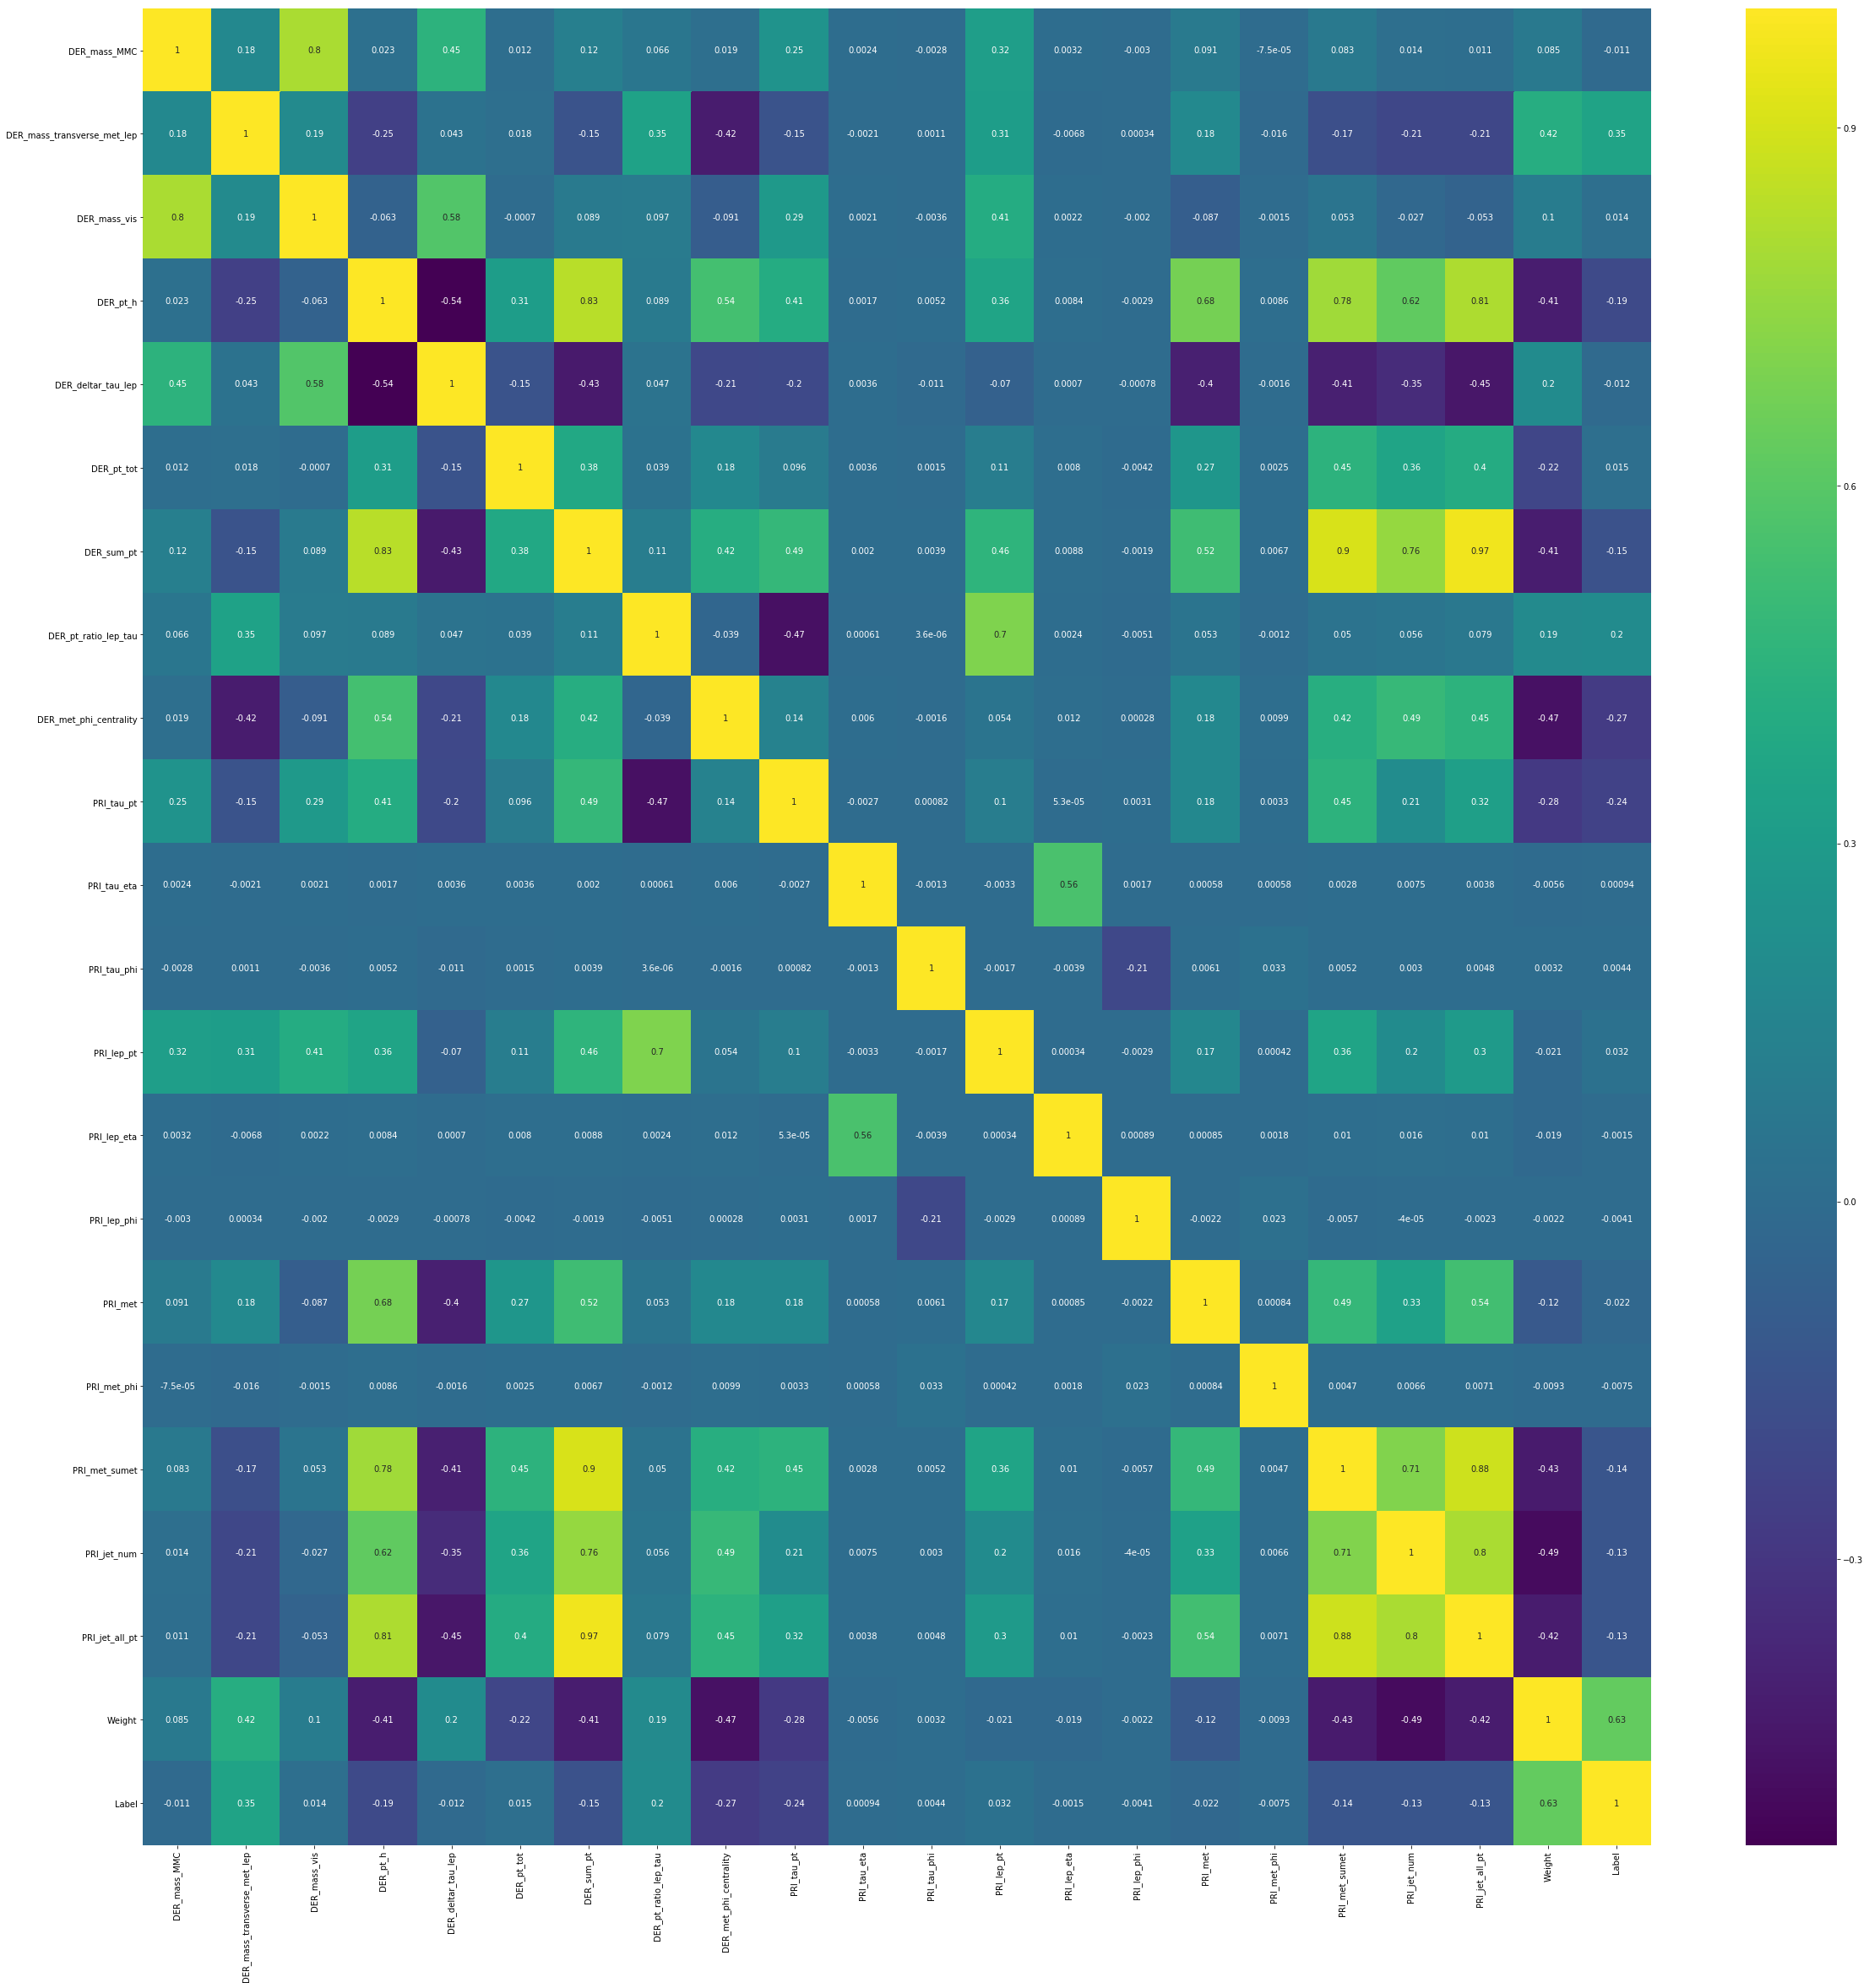

In [22]:
plt.figure(figsize = (40,40))
sns.heatmap(data_train.corr(), annot=True, cmap='viridis')

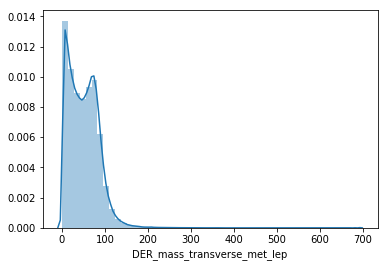

In [23]:
sns.distplot(data_train['DER_mass_transverse_met_lep'])

It is possible to see the outliers using a box plot by each variable

In [24]:
def box_plot(x_axis, y_axis):
    data = pd.concat([data_train[y_axis], data_train[x_axis]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=x_axis, y=y_axis, data=data)
    fig.axis()

/Users/eabg97/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


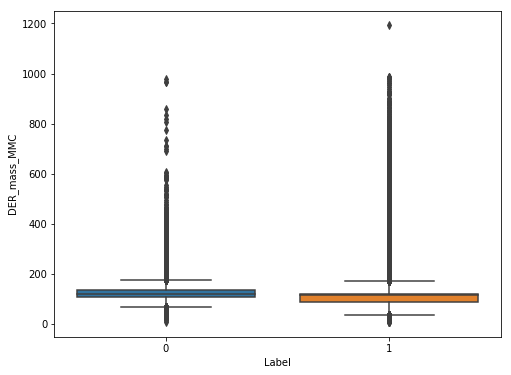

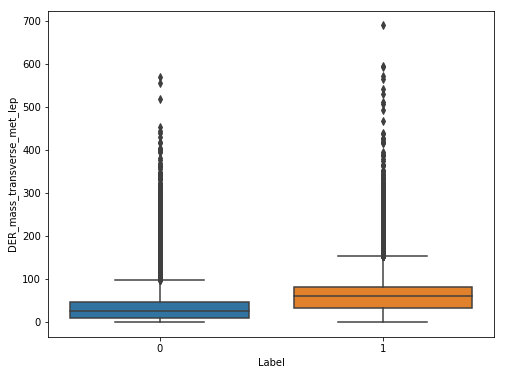

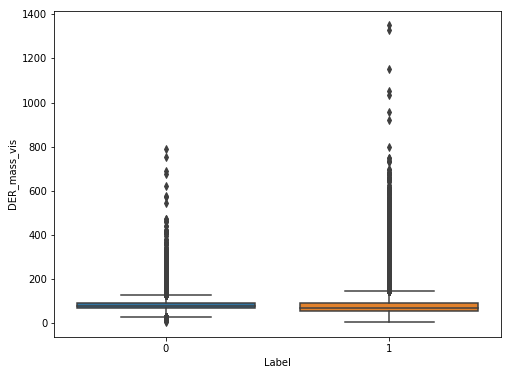

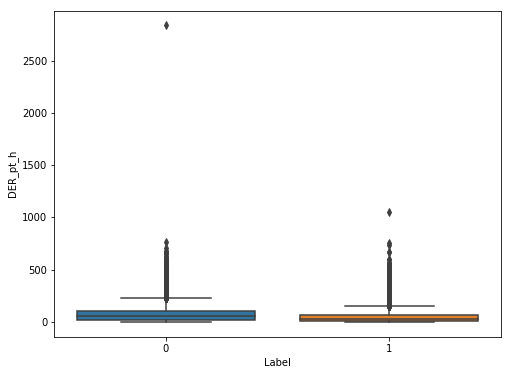

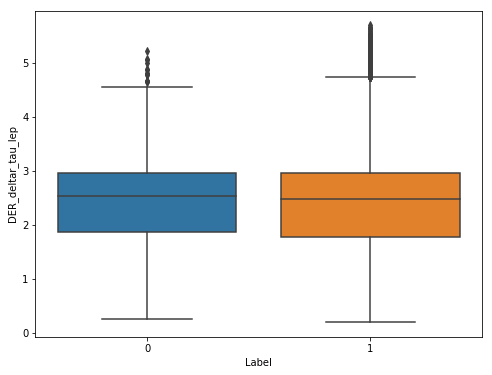

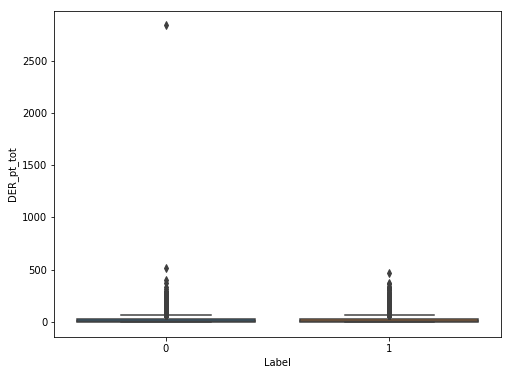

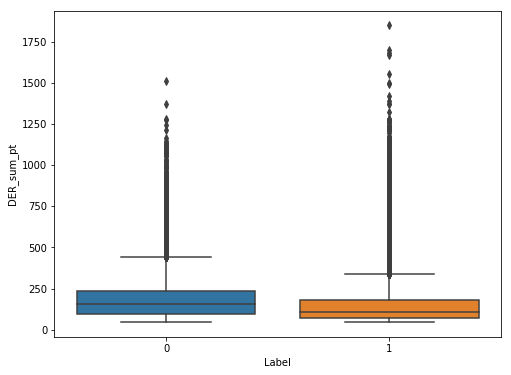

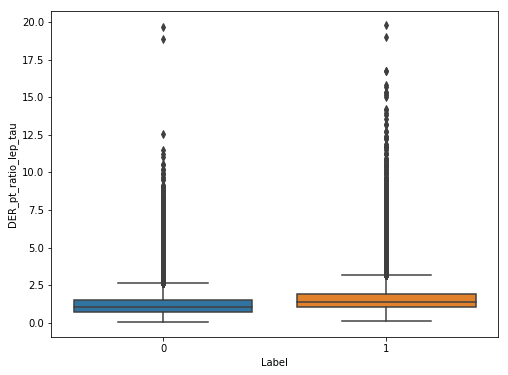

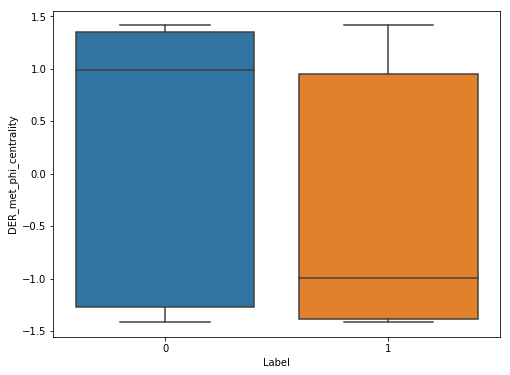

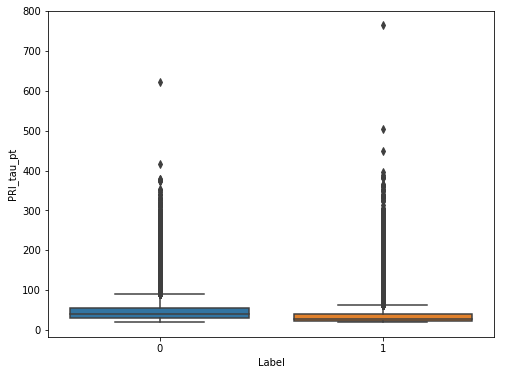

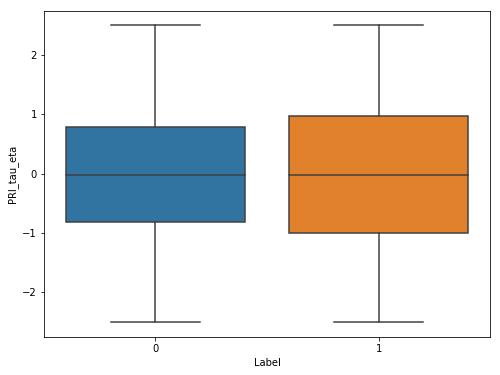

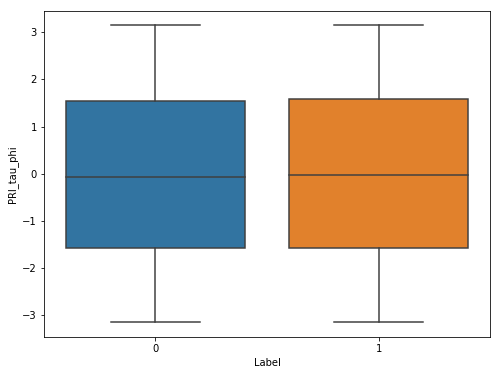

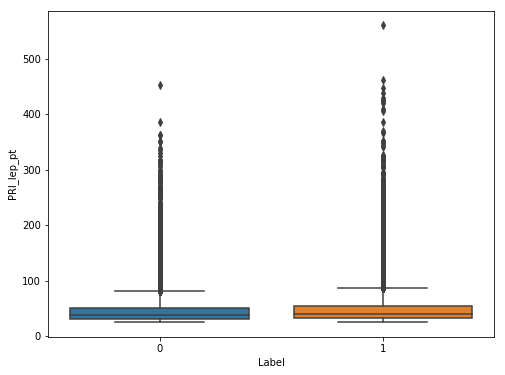

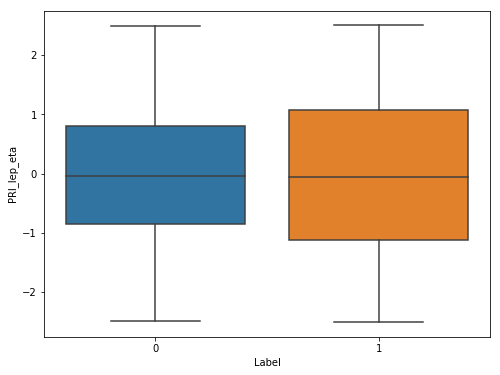

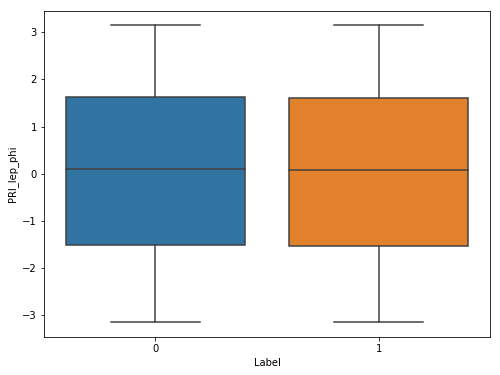

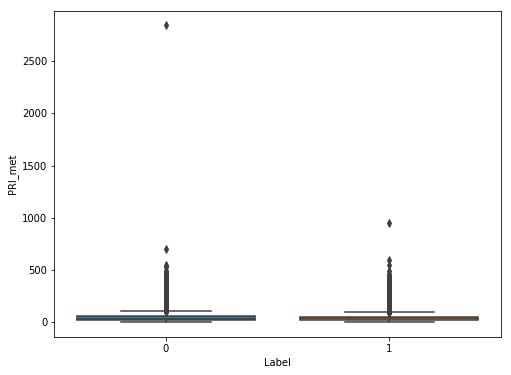

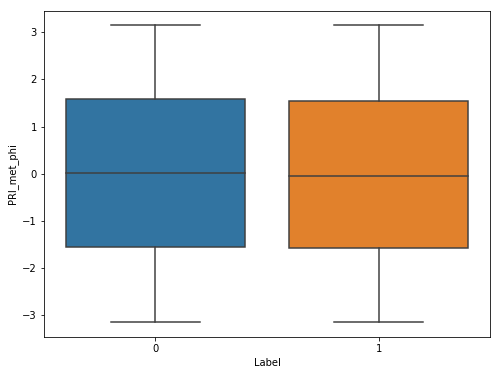

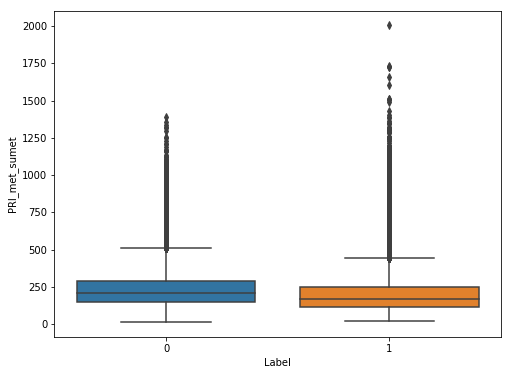

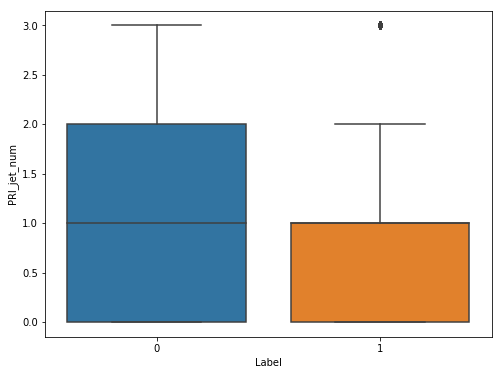

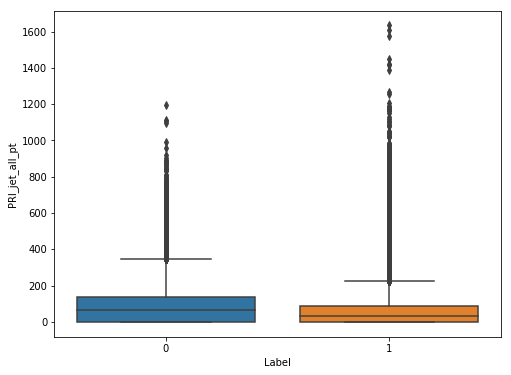

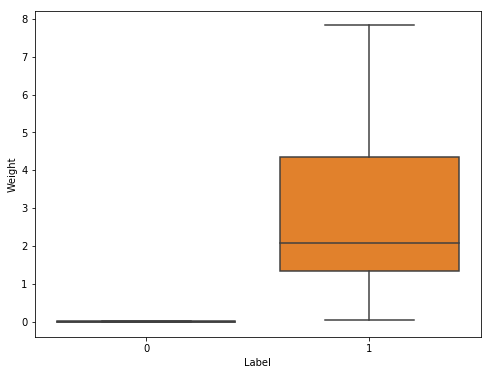

In [25]:
columns = data_train.columns.values[:-1]
pred = data_train.columns.values[-1]
for i in columns:
    box_plot(pred, i)

In the next plot we see how scatter are the attributes in a sample of 1000

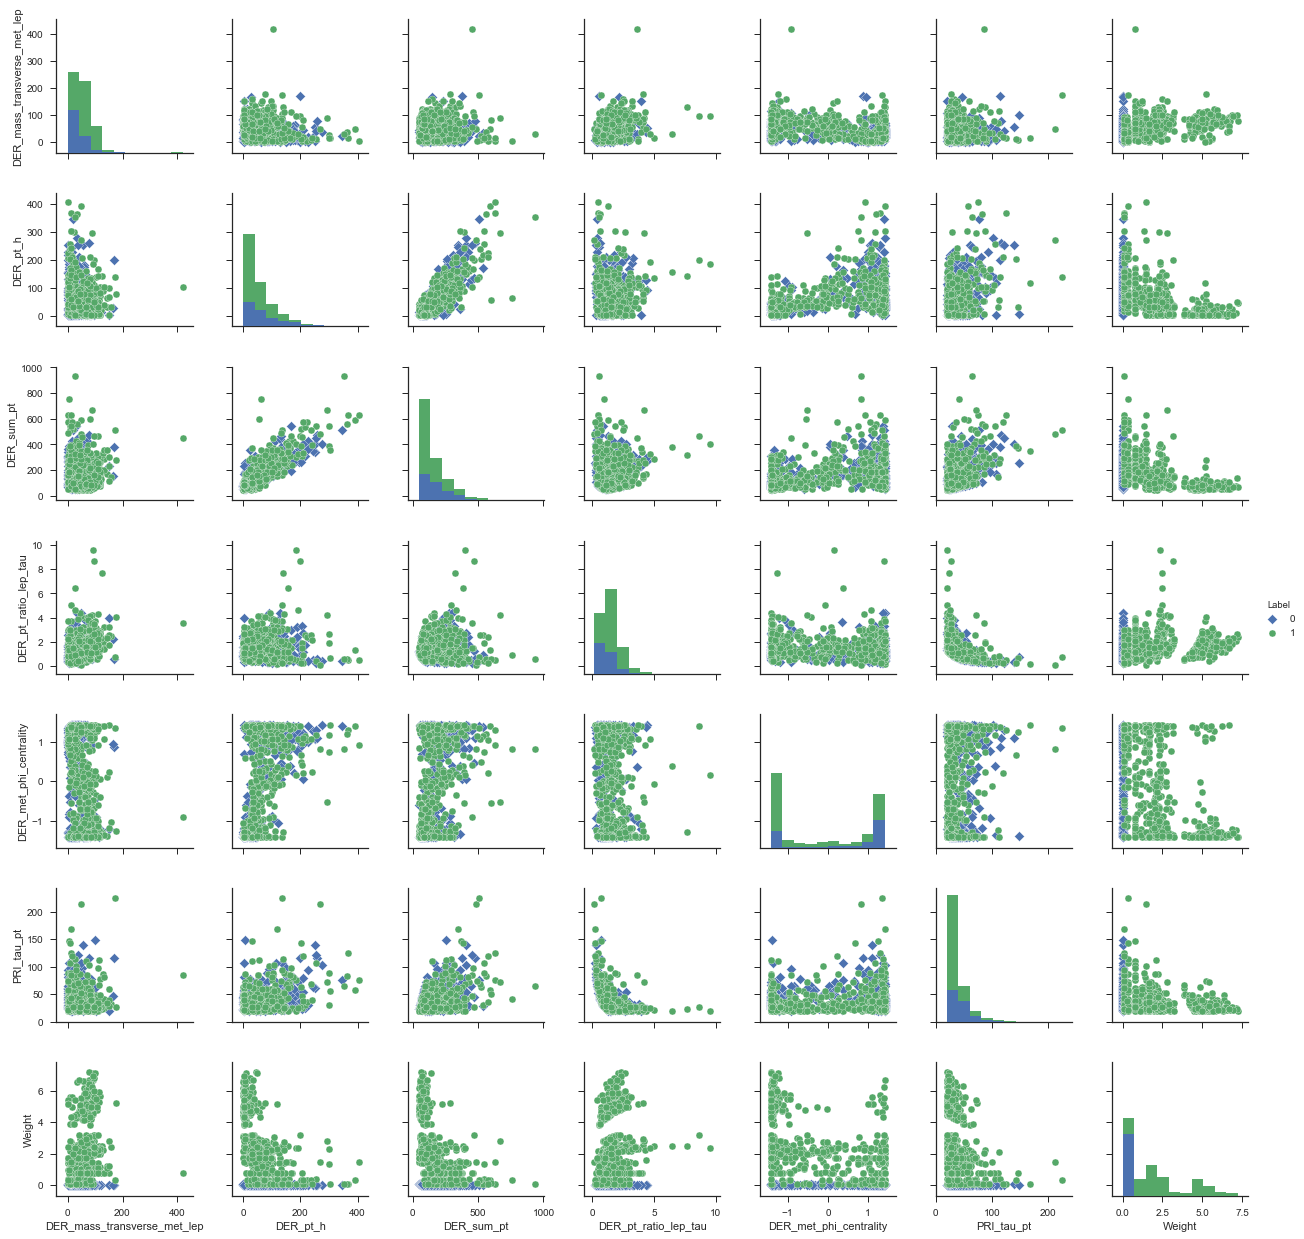

In [26]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_train.sample(1000), hue='Label', vars=cols_correlated, markers=['D', 'o'])

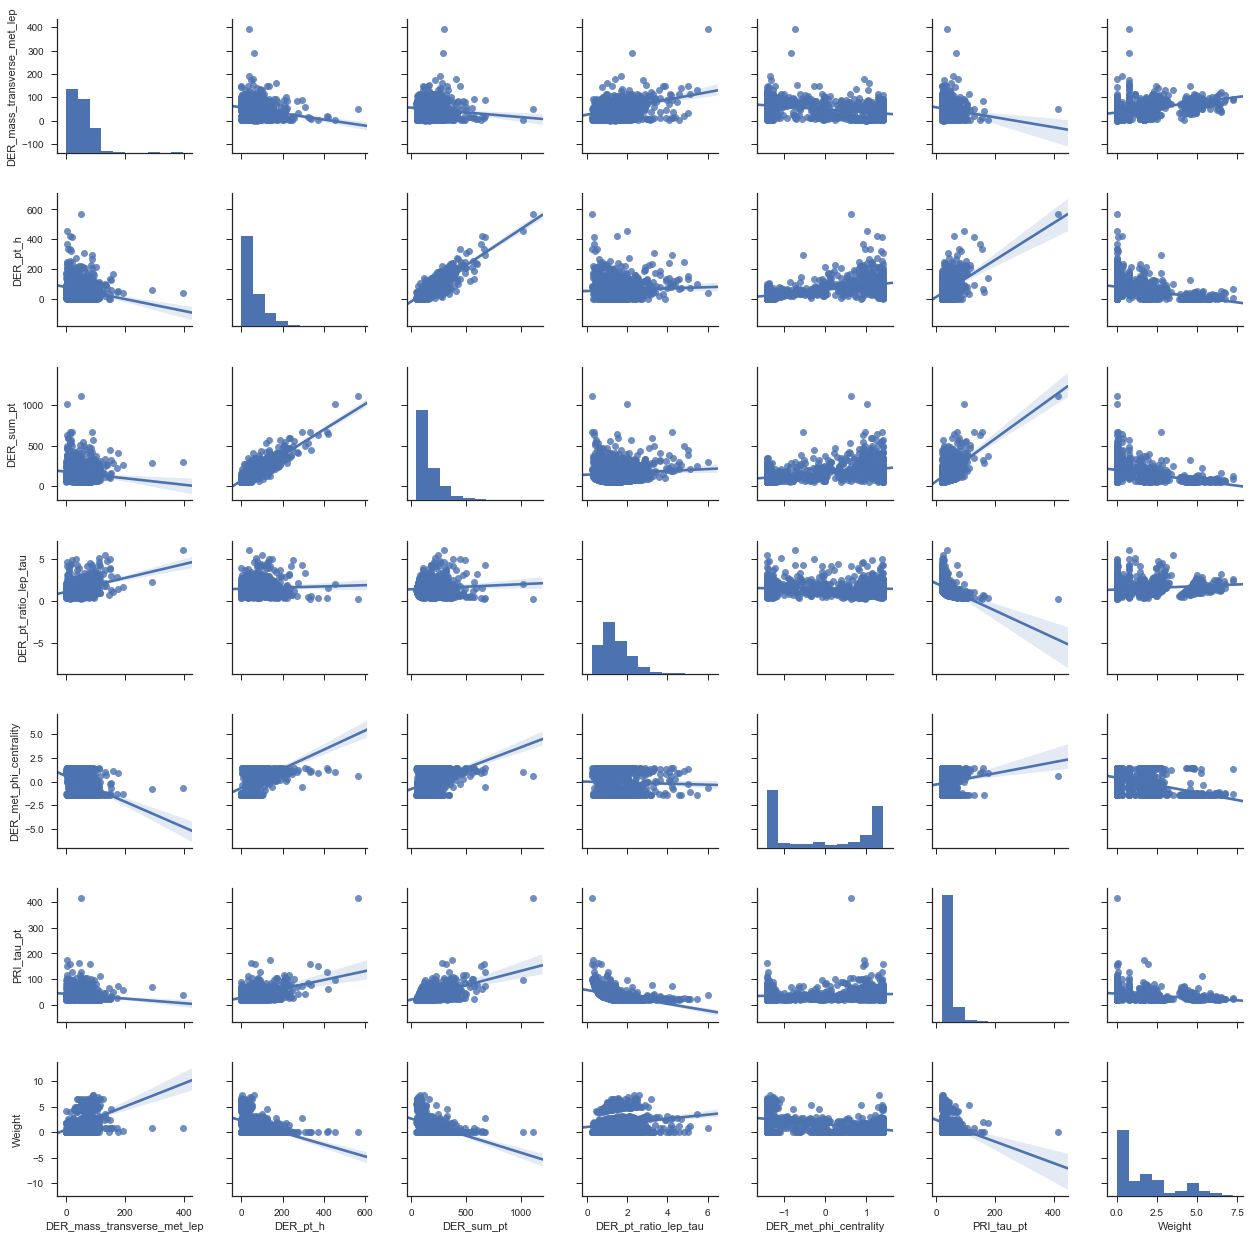

In [27]:
sns.pairplot(data_train[cols_correlated].sample(1000), kind="reg")

In [28]:
data_train.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,121.858528,49.239819,81.181982,57.895962,2.373100,18.917332,158.432217,1.437609,-0.128305,38.707419,...,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,73.064591,1.646767,0.657332
std,52.749898,35.344886,40.828691,63.655682,0.782911,22.273494,115.706115,0.844743,1.193585,22.412081,...,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,98.015662,1.875103,0.474603
min,9.044000,0.000000,6.329000,0.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,20.000000,...,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000,0.001502,0.000000
25%,95.665000,19.241000,59.388750,14.068750,1.810000,2.841000,77.550000,0.883000,-1.371000,24.591750,...,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,0.000000,0.018636,0.000000
50%,119.958000,46.524000,73.752000,38.467500,2.491500,12.315500,120.664500,1.280000,-0.356000,31.804000,...,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,40.512500,1.156188,1.000000
75%,130.606250,73.598000,92.259000,79.169000,2.961000,27.591000,200.478250,1.777000,1.225000,45.017000,...,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,109.933750,2.404128,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,764.408000,...,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000,7.822543,1.000000


In [29]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi                    250000 non-null float64
PRI_lep_pt                     250000 non-null float64
PRI_lep_eta                    250000 non-null float64
PRI_lep_phi                    250000 non-null float64
PRI_met                        250000 non-null float64
PRI_met_p

In [30]:
data_train['PRI_jet_num'] = data_train['PRI_jet_num'].astype('float64')
data_train['Label'] = data_train['Label'].astype('float64')
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
DER_mass_MMC                   250000 non-null float64
DER_mass_transverse_met_lep    250000 non-null float64
DER_mass_vis                   250000 non-null float64
DER_pt_h                       250000 non-null float64
DER_deltar_tau_lep             250000 non-null float64
DER_pt_tot                     250000 non-null float64
DER_sum_pt                     250000 non-null float64
DER_pt_ratio_lep_tau           250000 non-null float64
DER_met_phi_centrality         250000 non-null float64
PRI_tau_pt                     250000 non-null float64
PRI_tau_eta                    250000 non-null float64
PRI_tau_phi                    250000 non-null float64
PRI_lep_pt                     250000 non-null float64
PRI_lep_eta                    250000 non-null float64
PRI_lep_phi                    250000 non-null float64
PRI_met                        250000 non-null float64
PRI_met_p

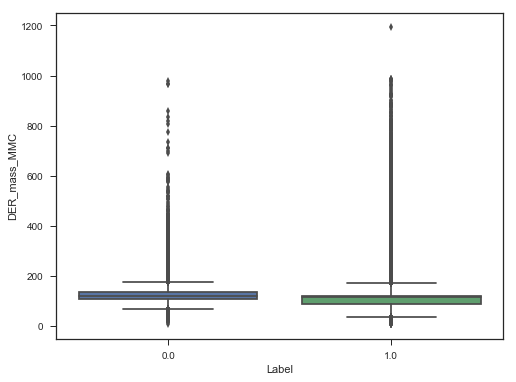

In [31]:
box_plot('Label', 'DER_mass_MMC')

In [32]:
data_train.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,138.470000,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,32.638,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2.0,113.497,0.002653,0.0
1,160.937000,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,42.014,...,36.918,0.501,0.103,44.704,-1.916,164.546,1.0,46.226,2.233584,1.0
2,121.858528,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,32.154,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1.0,44.251,2.347389,1.0
3,143.905000,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,22.647,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0.0,-0.000,5.446378,1.0
4,175.864000,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,28.209,...,29.774,0.798,1.569,2.723,-0.871,53.131,0.0,0.000,6.245333,1.0


In [33]:
X = data_train.iloc[:,:-2] # Without 'Weight' attribute
y = data_train.iloc[:,-1]

Due to outliers in some of our attributes, we will apply standard scaling in our data

In [34]:
from sklearn.preprocessing import StandardScaler
def scaling_x(X):
    sc = StandardScaler()
    return sc.fit_transform(X)

In [35]:
X = scaling_x(X)

In [36]:
# Preprocessing data_test
data_test.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,350000,-999.000,79.589,23.916,3.036,-999.000,-999.000,-999.000,0.903,3.036,...,2.022,98.556,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000
1,350001,106.398,67.490,87.949,49.994,-999.000,-999.000,-999.000,2.048,2.679,...,-1.138,176.251,1,47.575,-0.553,-0.849,-999.000,-999.000,-999.000,47.575
2,350002,117.794,56.226,96.358,4.137,-999.000,-999.000,-999.000,2.755,4.137,...,-1.868,111.505,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
3,350003,135.861,30.604,97.288,9.104,-999.000,-999.000,-999.000,2.811,9.104,...,1.172,164.707,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000
4,350004,74.159,82.772,58.731,89.646,1.347,536.663,-0.339,1.028,77.213,...,-0.231,869.614,3,254.085,-1.013,-0.334,185.857,0.335,2.587,599.213


In [37]:
data_test = data_test[data_train.columns.values[:-2]]

In [38]:
data_test['DER_mass_MMC'] = change_NaN_or_negative_rows_to_mean('DER_mass_MMC', data_test)

In [39]:
data_test.head()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,121.875333,79.589,23.916,3.036,0.903,3.036,56.018,1.536,-1.404,22.088,-0.540,-0.609,33.930,-0.504,-1.511,48.509,2.022,98.556,0,-0.000
1,106.398000,67.490,87.949,49.994,2.048,2.679,132.865,1.777,-1.204,30.716,-1.784,3.054,54.574,-0.169,1.795,21.093,-1.138,176.251,1,47.575
2,117.794000,56.226,96.358,4.137,2.755,4.137,97.600,1.096,-1.408,46.564,-0.298,3.079,51.036,-0.548,0.336,19.461,-1.868,111.505,0,0.000
3,135.861000,30.604,97.288,9.104,2.811,9.104,94.112,0.819,-1.382,51.741,0.388,-1.408,42.371,-0.295,2.148,25.131,1.172,164.707,0,0.000
4,74.159000,82.772,58.731,89.646,1.028,77.213,721.552,1.713,-0.913,45.087,-1.548,1.877,77.252,-1.913,2.838,22.200,-0.231,869.614,3,599.213


In [40]:
X_test = data_test.iloc[:,:]
X_test = scaling_x(X_test)

# Model

We split our training data to know the accuracy after model our neural network

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_eval_test, y_train, y_eval_test = train_test_split(X, y, test_size=0.15)

In [42]:
X_train.shape, y_train.shape, X_eval_test.shape, y_eval_test.shape

((212500, 20), (212500,), (37500, 20), (37500,))

In [43]:
X_test.shape

(550000, 20)

We fix the parameters BATCH_SIZE and EPOCHS for our neural network

In [44]:
BATCH_SIZE = 4000
EPOCHS = 30

Import the keras library to run our model

In [45]:
from keras import Sequential
from keras.layers import Dense, Dropout, Reshape

Using TensorFlow backend.
/Users/eabg97/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Here we implement our architecture to get the best prediction accuracy.

Also we are using 'binary_crossentropy' with the optimizer 'adam'

In [46]:
model = Sequential()
model.add(Dense(20, input_dim=20, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(200, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(30, kernel_initializer='random_uniform', activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               4200      
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 30)                6030      
_________________________________________________________________
dropout_3 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total para

Run the model

In [47]:
train = model.fit(X_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)

Epoch 1/30
212500/212500 [==============================] - 1s 5us/step - loss: 0.6644 - acc: 0.6564
Epoch 2/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.5266 - acc: 0.6573
Epoch 3/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4809 - acc: 0.7783
Epoch 4/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4527 - acc: 0.7995
Epoch 5/30
212500/212500 [==============================] - 1s 4us/step - loss: 0.4364 - acc: 0.8042
Epoch 6/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4286 - acc: 0.8079
Epoch 7/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4249 - acc: 0.8103
Epoch 8/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4206 - acc: 0.8128
Epoch 9/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4197 - acc: 0.8131
Epoch 10/30
212500/212500 [==============================] - 1s 3us/step - loss: 0.4185 - a

In [48]:
from keras import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Reshape, GlobalAveragePooling1D, Flatten

num_classes = 2
input_shape = (20,)

X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_eval_test2 = X_eval_test.reshape(X_eval_test.shape[0], X_eval_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(64, (3), input_shape=(20,1), activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 64)            256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 16, 64)            12352     
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 64)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 6, 32)             6176      
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 32)             0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 3, 32)             0         
__________

In [49]:
train = model.fit(X_train2, y_train, batch_size=BATCH_SIZE, epochs=30)

Epoch 1/30
212500/212500 [==============================] - 10s 48us/step - loss: 0.6236 - acc: 0.6441
Epoch 2/30
212500/212500 [==============================] - 11s 50us/step - loss: 0.5268 - acc: 0.7297
Epoch 3/30
212500/212500 [==============================] - 10s 46us/step - loss: 0.4749 - acc: 0.7750
Epoch 4/30
212500/212500 [==============================] - 9s 44us/step - loss: 0.4543 - acc: 0.7898
Epoch 5/30
212500/212500 [==============================] - 9s 44us/step - loss: 0.4436 - acc: 0.7962
Epoch 6/30
212500/212500 [==============================] - 11s 52us/step - loss: 0.4359 - acc: 0.7999
Epoch 7/30
212500/212500 [==============================] - 9s 44us/step - loss: 0.4314 - acc: 0.8029
Epoch 8/30
212500/212500 [==============================] - 9s 43us/step - loss: 0.4276 - acc: 0.8042
Epoch 9/30
212500/212500 [==============================] - 9s 43us/step - loss: 0.4230 - acc: 0.8066
Epoch 10/30
212500/212500 [==============================] - 9s 43us/step - lo

We plot the graph of accuracy and loss

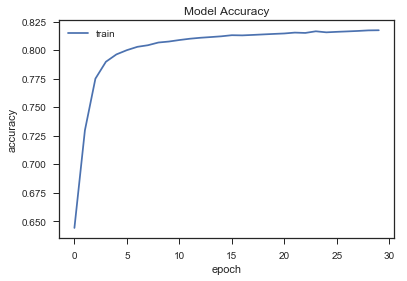

In [50]:
plt.plot(train.history['acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

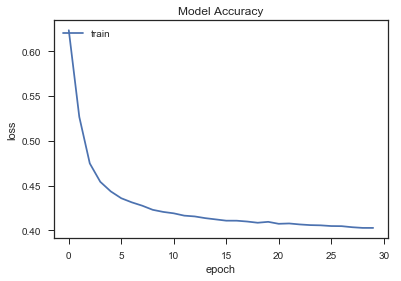

In [51]:
plt.plot(train.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

How the prediction is a probability between 0 and 1, we have to binarize our result, if a value is greater equal than 0.5 is 1 and otherwise 0.

In [54]:
X_eval = X_eval_test.reshape(X_eval_test.shape[0], X_eval_test.shape[1], 1)
y_pred = model.predict(X_eval)
y_pred = [0 if i < 0.5 else 1 for i in y_pred]

The Metrics are accuracy and auc roc score

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_eval_test, y_pred)

0.8241866666666666

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_eval_test, y_pred)

0.798581930196024

Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_eval_test, y_pred)

array([[ 9214,  3632],
       [ 2961, 21693]])

Finally we predict the test dataset

In [58]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
y_final_pred = model.predict(X_test)
y_pred = [0 if i < 0.5 else 1 for i in y_pred]